In [1]:
import bs4 as bs
import pickle
import requests
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
#import mplfinance
import plotly.graph_objects as go
#from mplfinance import candlestick_ohlc
import matplotlib.dates as mdates

/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
style.use('ggplot')

In [3]:
start = dt.datetime(2000, 1,1)
end = dt.datetime(2016,12,31)

In [4]:
df = web.DataReader('TSLA', 'yahoo', start, end)

In [5]:
df.to_csv('tsla.csv')

In [6]:
df = pd.read_csv('tsla.csv', parse_dates = True, index_col = 0)
print(df.head())

             High        Low       Open      Close    Volume  Adj Close
Date                                                                   
2010-06-29  25.00  17.540001  19.000000  23.889999  18766300  23.889999
2010-06-30  30.42  23.299999  25.790001  23.830000  17187100  23.830000
2010-07-01  25.92  20.270000  25.000000  21.959999   8218800  21.959999
2010-07-02  23.10  18.709999  23.000000  19.200001   5139800  19.200001
2010-07-06  20.00  15.830000  20.000000  16.110001   6866900  16.110001


                 Open   High
Date                        
2010-06-29  19.000000  25.00
2010-06-30  25.790001  30.42
2010-07-01  25.000000  25.92
2010-07-02  23.000000  23.10
2010-07-06  20.000000  20.00


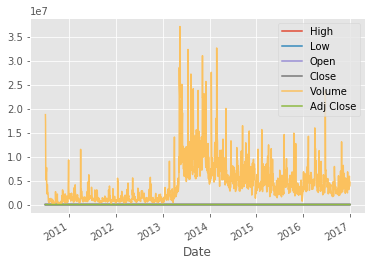

In [7]:
df.plot()
print(df[['Open', 'High']].head())

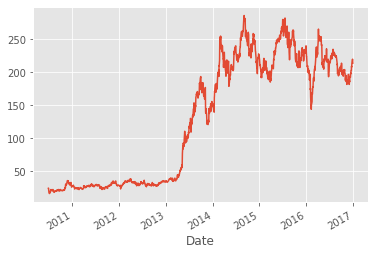

In [8]:
df['Adj Close'].plot()

In [9]:
df['100ma'] = df['Adj Close'].rolling(window = 100, min_periods = 0).mean()

In [10]:
%matplotlib notebook  
#This is to make sure the images are interactable

df.dropna(inplace = True)  #dropping all rows that have no value, only including the ones that do have
print(df.head())

             High        Low       Open      Close    Volume  Adj Close  \
Date                                                                      
2010-06-29  25.00  17.540001  19.000000  23.889999  18766300  23.889999   
2010-06-30  30.42  23.299999  25.790001  23.830000  17187100  23.830000   
2010-07-01  25.92  20.270000  25.000000  21.959999   8218800  21.959999   
2010-07-02  23.10  18.709999  23.000000  19.200001   5139800  19.200001   
2010-07-06  20.00  15.830000  20.000000  16.110001   6866900  16.110001   

                100ma  
Date                   
2010-06-29  23.889999  
2010-06-30  23.860000  
2010-07-01  23.226666  
2010-07-02  22.220000  
2010-07-06  20.998000  


<IPython.core.display.Javascript object>


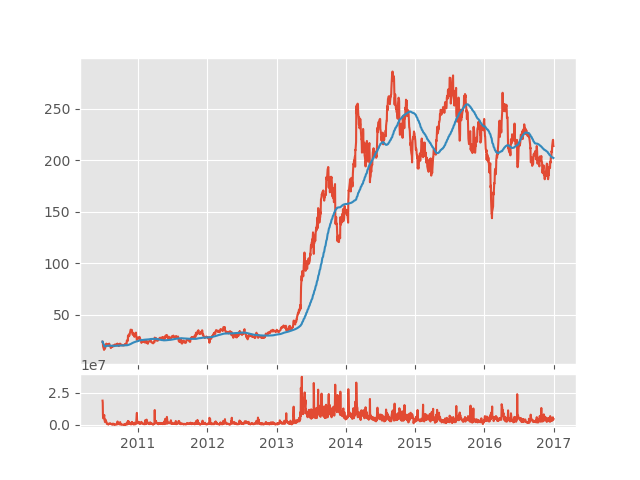

In [11]:
#creating a graph by grid and axis defination first

ax1 = plt.subplot2grid((6,1), (0,0), rowspan= 5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan= 1, colspan=1, sharex = ax1) #sharex is for them to have diff x axis'

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.plot(df.index, df['Volume'])

plt.show()

In [12]:
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()

In [13]:
print(df_ohlc.head())

                 open       high        low      close
Date                                                  
2010-06-29  23.889999  23.889999  15.800000  17.459999
2010-07-09  17.400000  20.639999  17.049999  20.639999
2010-07-19  21.910000  21.910000  20.219999  20.719999
2010-07-29  20.350000  21.950001  19.590000  19.590000
2010-08-08  19.600000  19.600000  17.600000  19.150000


In [14]:
df_ohlc.reset_index(inplace = True)

In [15]:
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)  #converting to mdates

In [16]:
print(df_ohlc.head())

       Date       open       high        low      close
0  733952.0  23.889999  23.889999  15.800000  17.459999
1  733962.0  17.400000  20.639999  17.049999  20.639999
2  733972.0  21.910000  21.910000  20.219999  20.719999
3  733982.0  20.350000  21.950001  19.590000  19.590000
4  733992.0  19.600000  19.600000  17.600000  19.150000


In [17]:
ax1.xaxis_date()

In [18]:
fig = go.Figure(data=[go.Candlestick(x = ax1), df_ohlc.values, increasing_line_color = 'green'])

SyntaxError: invalid syntax (<ipython-input-18-7f8c3e9e2ca3>, line 1)